<a href="https://colab.research.google.com/github/bblgm25/dsc-course0-m8-lab/blob/main/Lab_6_Scenario_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scenario 1: Retail Inventory Analysis

#Your prompt

 Using Python with pandas and matplotlib, write code to analyze inventory turnover based on the following DataFrame columns:
- product_id
- category
- stock_level
- last_restock_date
- sales_last_30_days
- supplier_lead_time
- unit_cost

Tasks:
1. Calculate inventory turnover rates (sales_last_30_days ÷ stock_level).
2. Identify slow-moving items (lowest 20% turnover).
3. Predict potential stockouts based on current stock, sales trends, and supplier_lead_time.
4. Create visualizations (e.g., bar charts) for inventory turnover and predicted stockouts.
5. Include comments explaining each step in the code.

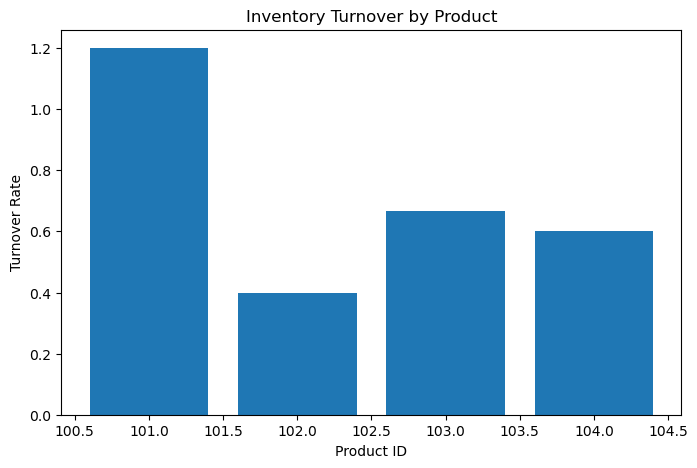

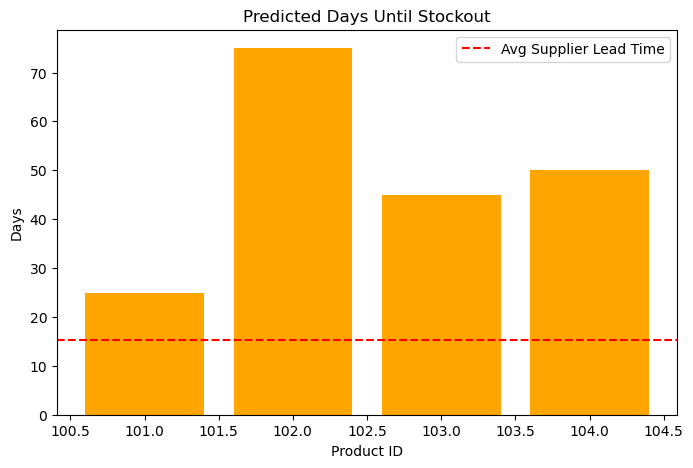

Slow-moving items:
    product_id  category  stock_level last_restock_date  sales_last_30_days  \
1         102  Clothing          200        2025-06-15                  80   

   supplier_lead_time  unit_cost  inventory_turnover  
1                   7         20                 0.4  
Products predicted to stock out:
 Empty DataFrame
Columns: [product_id, category, stock_level, last_restock_date, sales_last_30_days, supplier_lead_time, unit_cost, inventory_turnover, days_until_stockout, predicted_stockout]
Index: []


In [ ]:
#Generated code

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample DataFrame
data = {
    "product_id": [101, 102, 103, 104],
    "category": ["Electronics", "Clothing", "Electronics", "Furniture"],
    "stock_level": [50, 200, 15, 5],
    "last_restock_date": ["2025-06-01", "2025-06-15", "2025-06-10", "2025-07-01"],
    "sales_last_30_days": [60, 80, 10, 3],
    "supplier_lead_time": [10, 7, 14, 30],
    "unit_cost": [200, 20, 150, 500]
}

df = pd.DataFrame(data)
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

# 1. Inventory turnover
df['inventory_turnover'] = df['sales_last_30_days'] / df['stock_level']

# 2. Slow-moving items (lowest 20% turnover)
threshold = df['inventory_turnover'].quantile(0.2)
slow_moving = df[df['inventory_turnover'] <= threshold]

# 3. Predict potential stockouts
df['days_until_stockout'] = (df['stock_level'] / (df['sales_last_30_days'] / 30)).round(1)
df['predicted_stockout'] = df['days_until_stockout'] < df['supplier_lead_time']

# 4. Visualizations
plt.figure(figsize=(8,5))
plt.bar(df['product_id'], df['inventory_turnover'])
plt.title('Inventory Turnover by Product')
plt.xlabel('Product ID')
plt.ylabel('Turnover Rate')
plt.show()

plt.figure(figsize=(8,5))
plt.bar(df['product_id'], df['days_until_stockout'], color='orange')
plt.title('Predicted Days Until Stockout')
plt.xlabel('Product ID')
plt.ylabel('Days')
plt.axhline(df['supplier_lead_time'].mean(), color='red', linestyle='--', label='Avg Supplier Lead Time')
plt.legend()
plt.show()

print("Slow-moving items:\n", slow_moving)
print("Products predicted to stock out:\n", df[df['predicted_stockout']])


#Follow-up Prompts

- Add numeric data labels on top of each bar
- Change bar colors based on whether they are below or above the supplier lead time threshold

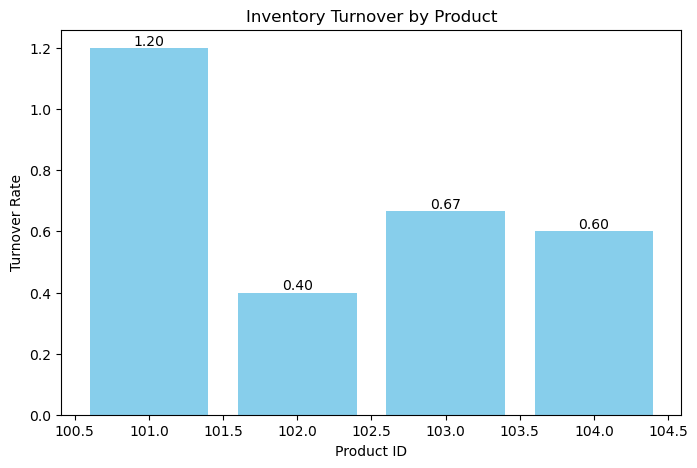

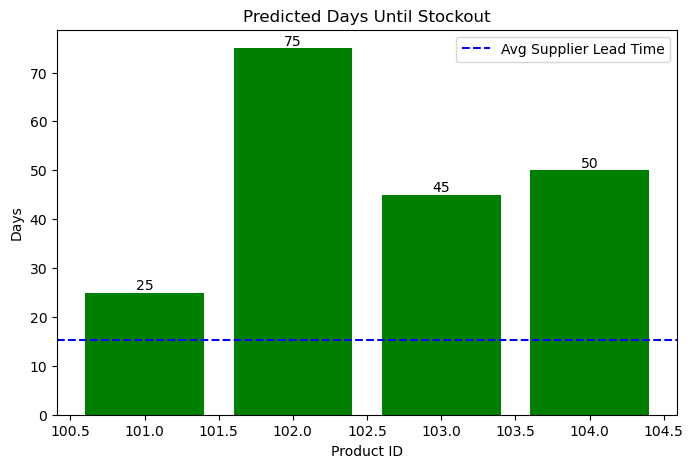

Slow-moving items:
    product_id  category  stock_level last_restock_date  sales_last_30_days  \
1         102  Clothing          200        2025-06-15                  80   

   supplier_lead_time  unit_cost  inventory_turnover  
1                   7         20                 0.4  

Products predicted to stock out:
 Empty DataFrame
Columns: [product_id, category, stock_level, last_restock_date, sales_last_30_days, supplier_lead_time, unit_cost, inventory_turnover, days_until_stockout, predicted_stockout]
Index: []


In [ ]:
#Final Solution

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample DataFrame
data = {
    "product_id": [101, 102, 103, 104],
    "category": ["Electronics", "Clothing", "Electronics", "Furniture"],
    "stock_level": [50, 200, 15, 5],
    "last_restock_date": ["2025-06-01", "2025-06-15", "2025-06-10", "2025-07-01"],
    "sales_last_30_days": [60, 80, 10, 3],
    "supplier_lead_time": [10, 7, 14, 30],
    "unit_cost": [200, 20, 150, 500]
}

df = pd.DataFrame(data)
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

# 1. Inventory turnover
df['inventory_turnover'] = df['sales_last_30_days'] / df['stock_level']

# 2. Slow-moving items (lowest 20% turnover)
threshold = df['inventory_turnover'].quantile(0.2)
slow_moving = df[df['inventory_turnover'] <= threshold]

# 3. Predict potential stockouts
df['days_until_stockout'] = (df['stock_level'] / (df['sales_last_30_days'] / 30)).round(1)
df['predicted_stockout'] = df['days_until_stockout'] < df['supplier_lead_time']

# 4. Visualization: Inventory Turnover with labels
plt.figure(figsize=(8, 5))
bars = plt.bar(df['product_id'], df['inventory_turnover'], color='skyblue')
plt.title('Inventory Turnover by Product')
plt.xlabel('Product ID')
plt.ylabel('Turnover Rate')

# Add numeric labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')
plt.show()

# 5. Visualization: Predicted Days Until Stockout with conditional colors
colors = ['red' if days < lead else 'green'
          for days, lead in zip(df['days_until_stockout'], df['supplier_lead_time'])]

plt.figure(figsize=(8, 5))
bars = plt.bar(df['product_id'], df['days_until_stockout'], color=colors)
plt.title('Predicted Days Until Stockout')
plt.xlabel('Product ID')
plt.ylabel('Days')
plt.axhline(df['supplier_lead_time'].mean(), color='blue', linestyle='--', label='Avg Supplier Lead Time')
plt.legend()

# Add numeric labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')
plt.show()

# 6. Output results
print("Slow-moving items:\n", slow_moving)
print("\nProducts predicted to stock out:\n", df[df['predicted_stockout']])


#Scenario Questions

 1. They converted dates with pd.to_datetime() and, when needed, calculated metrics like days_since_restock using datetime differences. Our code used date conversion for consistency but calculated days_until_stockout from sales data.

 2. Bar charts for turnover and stockouts were common. Prompts recommended color-coding at-risk products, adding numeric labels, and using threshold lines for context.

 3. By checking for zero or invalid stock values, ensuring numeric columns, and rounding outputs. Logical checks prevented misinterpreting stockout predictions.